In [1]:
import sqlite3
conn = sqlite3.connect('database_final.db')
cursor = conn.cursor()

In [2]:
# Fetch all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])
    table_name = table[0]

    # Fetch the column names of the table
    cursor.execute("PRAGMA table_info({})".format(table_name))
    columns = cursor.fetchall()

    # Print the column names
    for column in columns:
        print(column[1])
    print('\n\n')

table_name
Crime ID
Month
Reported by
Falls within
Longitude
Latitude
Location
LSOA code
LSOA name
Crime type
Last outcome category
Context



ward_code_to_name
geogcode
description



unemployement_Total
Gender
measure
geogcode
date
value



unemployement_Male
Gender
measure
geogcode
date
value



unemployement_Female
Gender
measure
geogcode
date
value



montly_unemployement_claimant_count_by_lsoa_barnet
index
geogcode
date
value



lsoa_code_to_name
geogcode
description



IOD_feature_code_score_19
LSOA Code
a. Index of Multiple Deprivation (IMD)
b. Income Deprivation Domain
c. Employment Deprivation Domain
d. Education, Skills and Training Domain
e. Health Deprivation and Disability Domain
f. Crime Domain
g. Barriers to Housing and Services Domain
h. Living Environment Deprivation Domain
i. Income Deprivation Affecting Children Index (IDACI)
j. Income Deprivation Affecting Older People Index (IDAOPI)



IOD_feature_code_score_15
LSOA Code
a. Index of Multiple Deprivation (IMD)
b. I

In [7]:
# main
import pandas as pd
table_query = "SELECT * FROM table_name WHERE month LIKE '2019%' OR month LIKE '2015%' OR month LIKE '2014%' OR month LIKE '2016%' OR month LIKE '2017%' OR month LIKE '2018%'"
table_df = pd.read_sql_query(table_query, conn)
table_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,4863590f21c94a4615474293784e6c262a358281f2c1ec...,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.877306,51.118088,On or near Acorn Close,E01032818,Ashford 009H,Violence and sexual offences,Under investigation,None
1,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
2,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
3,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
4,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
6095081,2db6b8818194dad1f20d236657df6301fc7972a13a87c8...,2019-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Violence and sexual offences,Under investigation,None
6095082,082651c5edbeeb3768326b31b6ae436247b2f0b551a207...,2019-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Violence and sexual offences,Under investigation,None
6095083,e1db861af2ab4c2529b42ab21ebc7ac06191ecfde308b4...,2019-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Other crime,Under investigation,None
6095084,954963efd52ec16d629856d7e3c2f978c18e4bd40dc513...,2019-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Other crime,Awaiting court outcome,None


In [12]:
df_2015 = table_df[table_df['Month'].str.startswith('2015')]
df_2016 = table_df[table_df['Month'].str.startswith('2016')]
df_2017 = table_df[table_df['Month'].str.startswith('2017')]
df_2018 = table_df[table_df['Month'].str.startswith('2018')]

df_20148 = pd.concat([df_20148, df_2015, df_2016, df_2017, df_2018])
df_20148

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,4863590f21c94a4615474293784e6c262a358281f2c1ec...,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.877306,51.118088,On or near Acorn Close,E01032818,Ashford 009H,Violence and sexual offences,Under investigation,None
1,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
2,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
3,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
4,None,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4987039,36acb8a68d06169312a0ecf6155e0401b02a427d45ee23...,2018-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Other crime,Investigation complete; no suspect identified,None
4987040,00edf7518985c0578ee6d40d8507642005d14883984646...,2018-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Other crime,Status update unavailable,None
4987041,62f85f2d11ff1fab8df02ccff2b504c27fc4642dd63d01...,2018-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Other crime,Investigation complete; no suspect identified,None
4987042,3fc2e0636da59ea6dab9a2ba606120d3006e38473bff2d...,2018-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,None,None,Other crime,Investigation complete; no suspect identified,None


In [13]:
# get necessary data from df_2019 and df_20148
conc_19 = df_2019[['Month', 'LSOA code', 'Crime type']]
conc_19 = conc_19[conc_19['Crime type'] == 'Burglary'].groupby(['Month', 'LSOA code']).size().reset_index(name='Number of Burglaries')
conc_19 = conc_19.sort_values('Month')
conc_19

conc_148 = df_20148[['Month', 'LSOA code', 'Crime type']]
conc_148 = conc_148[conc_148['Crime type'] == 'Burglary'].groupby(['Month', 'LSOA code']).size().reset_index(name='Number of Burglaries')
conc_148 = conc_148.sort_values('Month')
conc_148

,Month,LSOA code,Number of Burglaries
0,2014-01,E01000005,1
2323,2014-01,E01003303,7
2324,2014-01,E01003304,4
2325,2014-01,E01003305,1
2326,2014-01,E01003307,4
...,...,...,...
180217,2018-12,E01001653,1
180218,2018-12,E01001654,1
180219,2018-12,E01001655,2
180209,2018-12,E01001642,3


In [14]:
# unemployment
import pandas as pd
query = "SELECT geogcode AS 'LSOA code', strftime('%Y-%m', date) AS Month, value as 'Unemployment rate' FROM unemployement_Total"
df_unmepl = pd.read_sql_query(query, conn)
df_unmepl

,LSOA code,Month,Unemployment rate
0,E05000043,2013-01,260.0
1,E05000043,2013-02,265.0
2,E05000043,2013-03,255.0
3,E05000043,2013-04,240.0
4,E05000043,2013-05,240.0
...,...,...,...
2723,Column Total,2022-12,10985.0
2724,Column Total,2023-01,10695.0
2725,Column Total,2023-02,10765.0
2726,Column Total,2023-03,10845.0


In [16]:
df_unmepl['Month'] = pd.to_datetime(df_unmepl['Month'], format='%Y-%m-%d')
df_unmepl['Month'] = df_unmepl['Month'].dt.strftime('%Y-%m')
unempl_2014 = df_unmepl[df_unmepl['Month'].str.startswith('2014')]
unempl_2015 = df_unmepl[df_unmepl['Month'].str.startswith('2015')]
unempl_2016 = df_unmepl[df_unmepl['Month'].str.startswith('2016')]
unempl_2017 = df_unmepl[df_unmepl['Month'].str.startswith('2017')]
unempl_2018 = df_unmepl[df_unmepl['Month'].str.startswith('2018')]
df_20148 = pd.concat([unempl_2014, unempl_2015, unempl_2016, unempl_2017, unempl_2018])
df_20148

unempl_2019 = df_unmepl[df_unmepl['Month'].str.startswith('2019')].copy()
unempl_2019

,LSOA code,Month,Unemployment rate
12,E05000043,2014-01,220.0
13,E05000043,2014-02,220.0
14,E05000043,2014-03,210.0
15,E05000043,2014-04,190.0
16,E05000043,2014-05,190.0
...,...,...,...
2671,Column Total,2018-08,3715.0
2672,Column Total,2018-09,3925.0
2673,Column Total,2018-10,4130.0
2674,Column Total,2018-11,4240.0


In [17]:
# housing
query = "SELECT `LSOA code`, `Proportion rented` FROM housing_by_lsoa"
df_house = pd.read_sql_query(query, conn)
df_house

,LSOA code,Proportion rented
0,E01000001,0.419162
1,E01000002,0.472727
2,E01000003,0.625616
3,E01000005,0.916667
4,E01000006,0.504505
...,...,...
35667,W01002036,0.409091
35668,W01002037,0.398230
35669,W01002038,0.293103
35670,W01002039,0.201493


In [18]:
# sunlight
query = "SELECT `Sunlight`, `Year-Month` as `Month` FROM sunlight"
df_sun = pd.read_sql_query(query, conn)
df_sun

,Sunlight,Month
0,2.448102,2001-01-01 00:00:00
1,3.125319,2001-02-01 00:00:00
2,2.953300,2001-03-01 00:00:00
3,4.744445,2001-04-01 00:00:00
4,7.725524,2001-05-01 00:00:00
...,...,...
262,1.935724,2022-11-01 00:00:00
263,1.894136,2022-12-01 00:00:00
264,2.393847,2023-01-01 00:00:00
265,3.197894,2023-02-01 00:00:00


In [20]:
df_sun['Month'] = pd.to_datetime(df_sun['Month'], format='%Y-%m-%d')
df_sun['Month'] = df_sun['Month'].dt.strftime('%Y-%m')
sun_2014 = df_sun[df_sun['Month'].str.startswith('2014')]
sun_2015 = df_sun[df_sun['Month'].str.startswith('2015')]
sun_2016 = df_sun[df_sun['Month'].str.startswith('2016')]
sun_2017 = df_sun[df_sun['Month'].str.startswith('2017')]
sun_2018 = df_sun[df_sun['Month'].str.startswith('2018')]
sun_20148 = pd.concat([sun_2014, sun_2015, sun_2016, sun_2017, sun_2018])
sun_20148

sun_2019 = df_sun[df_sun['Month'].str.startswith('2019')]
sun_2019

,Sunlight,Month
216,1.740893,2019-01
217,4.363079,2019-02
218,4.164106,2019-03
219,5.779824,2019-04
220,6.574293,2019-05
221,5.710219,2019-06
222,6.829995,2019-07
223,6.713303,2019-08
224,5.423063,2019-09
225,2.654354,2019-10


In [25]:
# merge the data
merged_df_19 = pd.merge(conc_19, df_house, on=['LSOA code'])
merged_df_19 = pd.merge(merged_df_19, sun_2019, on=['Month'])
merged_df_19

merged_df_148 = pd.merge(conc_148, df_house, on=['LSOA code'])
merged_df_148 = pd.merge(merged_df_148, sun_20148, on=['Month'])
merged_df_148

# LSOA code for uneployment is not right yet

,Month,LSOA code,Number of Burglaries,Proportion rented,Sunlight
0,2014-01,E01000005,1,0.916667,1.783853
1,2014-01,E01003303,7,0.707692,1.783853
2,2014-01,E01003304,4,0.744076,1.783853
3,2014-01,E01003305,1,0.707006,1.783853
4,2014-01,E01003307,4,0.407692,1.783853
...,...,...,...,...,...
174347,2015-09,E01002868,1,0.349057,5.700259
174348,2015-09,E01033598,1,0.890909,5.700259
174349,2015-09,E01003425,1,0.087379,5.700259
174350,2015-09,E01001368,1,0.500000,5.700259


In [ ]:
# the model

In [26]:
lsoa_codes = merged_df_148['LSOA code'].unique()

# Dictionary to store dataframes for each LSOA
lsoa_data = {}

# Iterate over each LSOA code and create a separate dataframe
for lsoa_code in lsoa_codes:
    lsoa_df = merged_df_148[merged_df_148['LSOA code'] == lsoa_code].copy()
    lsoa_data[lsoa_code] = lsoa_df
    
from sklearn.ensemble import RandomForestRegressor

# Dictionary to store predictions for each LSOA
lsoa_predictions = {}

In [29]:
# regression
import numpy as np

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error, mean_absolute_percentage_error, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np

mael = []
msel = []
rmsel = []
r2l = []
explained_variancel =[]
median_absolutel = []
mapel = []
precisionl = []
recalll = []
f1l = []
accuracyl = []

# Get unique LSOA codes
lsoa_codes = merged_df_148['LSOA code'].unique()

lsoa_predictions = {}

for lsoa_code in lsoa_codes:
    train = merged_df_148[merged_df_148['LSOA code'] == lsoa_code]
    test = merged_df_19[merged_df_19['LSOA code'] == lsoa_code]
    
    # Check if data is not empty
    if not train.empty and not test.empty:
        # Split the training and testing set into x and y
        X_train = train[['Proportion rented', 'Sunlight']].values
        y_train = train['Number of Burglaries'].values
        X_test = test[['Proportion rented', 'Sunlight']].values
        y_test = test['Number of Burglaries'].values
        
        # random forest model
        model = RandomForestRegressor(n_estimators=100, random_state=123)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store the predictions for the current LSOA code
        lsoa_predictions[lsoa_code] = y_pred
        
        # Calculate the performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)
        median_absolute = median_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        mael.append(mae)
        msel.append(mse)
        rmsel.append(rmse)
        r2l.append(r2)
        explained_variancel.append(explained_variance)
        median_absolutel.append(median_absolute)
        mapel.append(mape)
    else:
        print('Warning: No data found for LSOA code', lsoa_code)

# Print the predictions for each LSOA code
#for lsoa_code, predictions in lsoa_predictions.items():
#    print('LSOA Code:', lsoa_code)
#    print('Predictions:', predictions)
#    print('---')
    
#performance metrics
final_mae = np.mean(mael)
final_mse = np.mean(msel)
final_rmse = np.mean(rmsel)
final_r2 = np.mean([x for x in r2l if not pd.isna(x)])
final_explained_variance = np.mean(explained_variancel)
final_median_absolute = np.mean(median_absolutel)
final_mape = np.mean(mapel)

print('Final Mean Absolute Error:', final_mae)
print('Final Mean Squared Error:', final_mse)
print('Final Root Mean Squared Error:', final_rmse)
print('Final R-squared Score:', final_r2)
print('Final Explained Variance Score:', final_explained_variance)
print('Final Median Absolute Error:', final_median_absolute)
print('Final Mean Absolute Percentage Error:', final_mape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


NameError: name 'np' is not defined

Final Mean Absolute Error: 0.9959780067529745
Final Mean Squared Error: 2.141717544887365
Final Root Mean Squared Error: 1.2812222874709014
Final R-squared Score: -1.187510149918872
Final Explained Variance Score: -0.701737707409468
Final Median Absolute Error: 0.8134847835405058
Final Mean Absolute Percentage Error: 0.569450661174798


{'E01000005': array([1.  , 1.29, 1.  , 1.08]),
 'E01003303': array([5.31, 3.29, 1.82, 1.47, 2.37, 3.31, 1.72, 1.49, 3.91, 2.39, 3.54,
        1.35]),
 'E01003304': array([5.  , 8.47, 3.29, 1.73, 3.03, 4.62, 3.4 , 1.61, 1.47, 1.74, 2.41]),
 'E01003305': array([1.09, 1.62, 2.04, 1.62, 1.26, 1.04]),
 'E01003307': array([2.45, 2.06, 1.91, 2.54, 1.49, 2.21, 4.74, 2.04, 2.19, 1.57, 2.02]),
 'E01003308': array([2.25, 2.6 , 2.1 , 2.15]),
 'E01003309': array([1.44, 1.1 , 2.78, 1.06, 2.02, 1.63]),
 'E01003312': array([1.67, 1.03, 1.23, 2.28, 1.02, 1.35]),
 'E01003313': array([1.21, 3.58, 1.63]),
 'E01003314': array([1.01, 1.01, 1.1 ]),
 'E01003315': array([2.55, 1.34, 1.02, 1.33, 2.32, 1.69]),
 'E01003316': array([2.03, 1.13, 1.32, 1.02, 1.  , 1.  ]),
 'E01003318': array([3.43, 3.52, 3.09, 2.29, 3.79, 3.43, 4.07, 4.86, 1.88, 4.46, 6.62]),
 'E01003320': array([1.05, 1.01, 1.1 , 1.05, 1.86, 1.04, 1.03, 1.  ]),
 'E01003321': array([1.96, 2.29, 2.46, 2.47, 2.16, 1.52, 1.49, 2.11, 1.02, 2.42]),
 'E01

In [ ]:
# classificaiton

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Get unique LSOA codes
lsoa_codes = merged_df_148['LSOA code'].unique()

lsoa_predictions = {}

for lsoa_code in lsoa_codes:
    train = merged_df_148[merged_df_148['LSOA code'] == lsoa_code]
    test = merged_df_19[merged_df_19['LSOA code'] == lsoa_code]
    
    # Check if data is not empty
    if not train.empty and not test.empty:
        # Split the training and testing set into x and y
        X_train = train[['Proportion rented', 'Sunlight']].values
        y_train = train['Number of Burglaries'].values
        X_test = test[['Proportion rented', 'Sunlight']].values
        y_test = test['Number of Burglaries'].values
        
        # random forest model
        model = RandomForestClassifier(n_estimators=100, random_state=123)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store the predictions for the current LSOA code
        lsoa_predictions[lsoa_code] = y_pred
        
        # Calculate the performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    else:
        print('Warning: No data found for LSOA code', lsoa_code)

# Print the predictions for each LSOA code
# for lsoa_code, predictions in lsoa_predictions.items():
#     print('LSOA Code:', lsoa_code)
#     print('Predictions:', predictions)
#     print('---')

# Performance metrics
final_accuracy = np.mean(accuracy_list)
final_precision = np.mean(precision_list)
final_recall = np.mean(recall_list)
final_f1 = np.mean(f1_list)

print('Final Accuracy:', final_accuracy)
print('Final Precision:', final_precision)
print('Final Recall:', final_recall)
print('Final F1 Score:', final_f1)

In [ ]:
# time lags

In [32]:
grouped = merged_df_148.groupby('Month').size()
pd.DataFrame(grouped)

,0
Month,
2014-01,3365
2014-02,3081
2014-03,3085
2014-04,2932
2014-05,2807
2014-06,2712
2014-07,2851
2014-08,2943
2014-09,2858


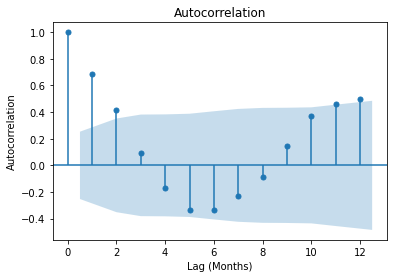

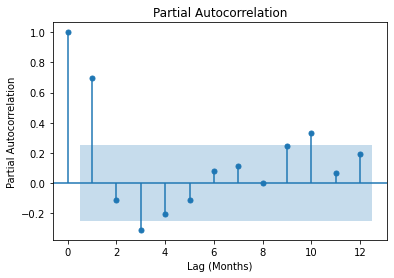

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_acf(grouped, lags=12, ax=ax)
ax.set_xlabel('Lag (Months)')
ax.set_ylabel('Autocorrelation')
plt.show()

fig, ax = plt.subplots()
plot_pacf(grouped, lags=12, ax=ax)
ax.set_xlabel('Lag (Months)')
ax.set_ylabel('Partial Autocorrelation')
plt.show()

In [34]:
merged_df_148['lag 1'] = merged_df_148['Number of Burglaries'].shift(1)
merged_df_148['lag 3'] = merged_df_148['Number of Burglaries'].shift(3)
merged_df_148['lag 10'] = merged_df_148['Number of Burglaries'].shift(10)
#month_df.iloc[[10]]
merged_df_148

,Month,LSOA code,Number of Burglaries,Proportion rented,Sunlight,lag 1,lag 3,lag 10
0,2014-01,E01000005,1,0.916667,1.783853,NaN,NaN,NaN
1,2014-01,E01003303,7,0.707692,1.783853,1.0,NaN,NaN
2,2014-01,E01003304,4,0.744076,1.783853,7.0,NaN,NaN
3,2014-01,E01003305,1,0.707006,1.783853,4.0,1.0,NaN
4,2014-01,E01003307,4,0.407692,1.783853,1.0,7.0,NaN
...,...,...,...,...,...,...,...,...
174347,2015-09,E01002868,1,0.349057,5.700259,2.0,1.0,4.0
174348,2015-09,E01033598,1,0.890909,5.700259,1.0,1.0,1.0
174349,2015-09,E01003425,1,0.087379,5.700259,1.0,2.0,1.0
174350,2015-09,E01001368,1,0.500000,5.700259,1.0,1.0,1.0


In [ ]:
# run the regression model again

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error, mean_absolute_percentage_error, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

mael = []
msel = []
rmsel = []
r2l = []
explained_variancel =[]
median_absolutel = []
mapel = []
precisionl = []
recalll = []
f1l = []
accuracyl = []

# Get unique LSOA codes
lsoa_codes = merged_df_148['LSOA code'].unique()

lsoa_predictions = {}

for lsoa_code in lsoa_codes:
    train = merged_df_148[merged_df_148['LSOA code'] == lsoa_code]
    test = merged_df_19[merged_df_19['LSOA code'] == lsoa_code]
    
    # Check if data is not empty
    if not train.empty and not test.empty:
        # Split the training and testing set into x and y
        X_train = train[['Proportion rented', 'Sunlight']].values
        y_train = train['Number of Burglaries'].values
        X_test = test[['Proportion rented', 'Sunlight']].values
        y_test = test['Number of Burglaries'].values
        
        # random forest model
        model = RandomForestRegressor(n_estimators=100, random_state=123)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store the predictions for the current LSOA code
        lsoa_predictions[lsoa_code] = y_pred
        
        # Calculate the performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)
        median_absolute = median_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        mael.append(mae)
        msel.append(mse)
        rmsel.append(rmse)
        r2l.append(r2)
        explained_variancel.append(explained_variance)
        median_absolutel.append(median_absolute)
        mapel.append(mape)
    else:
        print('Warning: No data found for LSOA code', lsoa_code)

# Print the predictions for each LSOA code
#for lsoa_code, predictions in lsoa_predictions.items():
#    print('LSOA Code:', lsoa_code)
#    print('Predictions:', predictions)
#    print('---')
    
#performance metrics
final_mae = np.mean(mael)
final_mse = np.mean(msel)
final_rmse = np.mean(rmsel)
final_r2 = np.mean([x for x in r2l if not pd.isna(x)])
final_explained_variance = np.mean(explained_variancel)
final_median_absolute = np.mean(median_absolutel)
final_mape = np.mean(mapel)

print('Final Mean Absolute Error:', final_mae)
print('Final Mean Squared Error:', final_mse)
print('Final Root Mean Squared Error:', final_rmse)
print('Final R-squared Score:', final_r2)
print('Final Explained Variance Score:', final_explained_variance)
print('Final Median Absolute Error:', final_median_absolute)
print('Final Mean Absolute Percentage Error:', final_mape)

In [36]:
# wards

In [49]:
# this is a random df, just made for tetsing maps
lsoas = list(lsoa_predictions.keys())
last_numbers = [lst[-1] for lst in lsoa_predictions.values()]
LSOA_count = pd.DataFrame({'LSOA code': lsoas, 'Predicted_nr_burglaries': last_numbers})
LSOA_count

,LSOA code,Predicted_nr_burglaries
0,E01000005,1.08
1,E01003303,1.35
2,E01003304,2.41
3,E01003305,1.04
4,E01003307,2.02
...,...,...
4661,E01030604,1.00
4662,E01021744,1.00
4663,E01032776,1.00
4664,E01015925,1.00


In [50]:
df_w = pd.read_csv('C:/Users/20212324/DC2/Lower_Layer_Super_Output_Area_(2021)_to_Ward_(2023)_to_LAD_(2023)_Lookup_in_England_and_Wales.csv')
df_ward_LSOA = pd.DataFrame()
df_ward_LSOA[['LSOA code', 'Ward code']] = df_w[['LSOA21CD', 'WD23CD']]
df_ward_LSOA

,LSOA code,Ward code
0,E01012239,E05014872
1,E01012286,E05014872
2,E01012287,E05014872
3,E01012288,E05014872
4,E01012289,E05014872
...,...,...
35667,W01001320,W05001625
35668,W01001321,W05001625
35669,W01001322,W05001625
35670,W01001324,W05001626


In [59]:
merged_LSOA_ward = pd.merge(df_ward_LSOA, LSOA_count, on=['LSOA code'])
merged_LSOA_ward

pred_burgl_per_ward = merged_LSOA_ward.groupby('Ward code').sum()
pred_burgl_per_ward = pred_burgl_per_ward.reset_index()
pred_burgl_per_ward

,Ward code,Predicted_nr_burglaries
0,E05002229,1.00
1,E05002240,1.00
2,E05004148,1.00
3,E05004150,1.01
4,E05004155,2.00
...,...,...
696,E05014119,12.40
697,E05015096,1.00
698,E05015097,1.10
699,E05015100,2.00


In [66]:
pred_burgl_per_ward.to_csv('ward_count.csv', index=False)

In [35]:
# Close the cursor and connection
cursor.close()
conn.close()